## Estudo sobre previsão dos valores do CUB usando PROPHET
- dados do CUB - SP (Sinduscon)
- Base de 2007 a 2019 - mensal

In [40]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#pacotes para gerar os gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#PROPHET
from fbprophet import Prophet

In [17]:
#formatação dos gráficos
sns.set_style('darkgrid')

In [4]:
# Abrindo o df
df = pd.read_excel('CUB_SP_R16N.xlsx')

In [8]:
df['data'] = df['ano'].map(str) + '-' + df['mes'].map(str)

In [9]:
df.head()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
0,2007,1,675.58,336.75,323.57,15.26,2007-1
1,2007,2,675.58,336.75,323.57,15.26,2007-2
2,2007,3,676.61,337.78,323.29,15.53,2007-3
3,2007,4,681.32,340.96,324.84,15.53,2007-4
4,2007,5,689.51,348.07,325.07,16.37,2007-5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
ano             152 non-null int64
mes             152 non-null int64
preco_global    152 non-null float64
preco_MO        152 non-null float64
preco_MAT       152 non-null float64
preco_ADM       152 non-null float64
data            152 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 8.4+ KB


In [11]:
df['data'] = pd.to_datetime(df['data'], format = '%Y-%m')

In [12]:
df.head()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
0,2007,1,675.58,336.75,323.57,15.26,2007-01-01
1,2007,2,675.58,336.75,323.57,15.26,2007-02-01
2,2007,3,676.61,337.78,323.29,15.53,2007-03-01
3,2007,4,681.32,340.96,324.84,15.53,2007-04-01
4,2007,5,689.51,348.07,325.07,16.37,2007-05-01


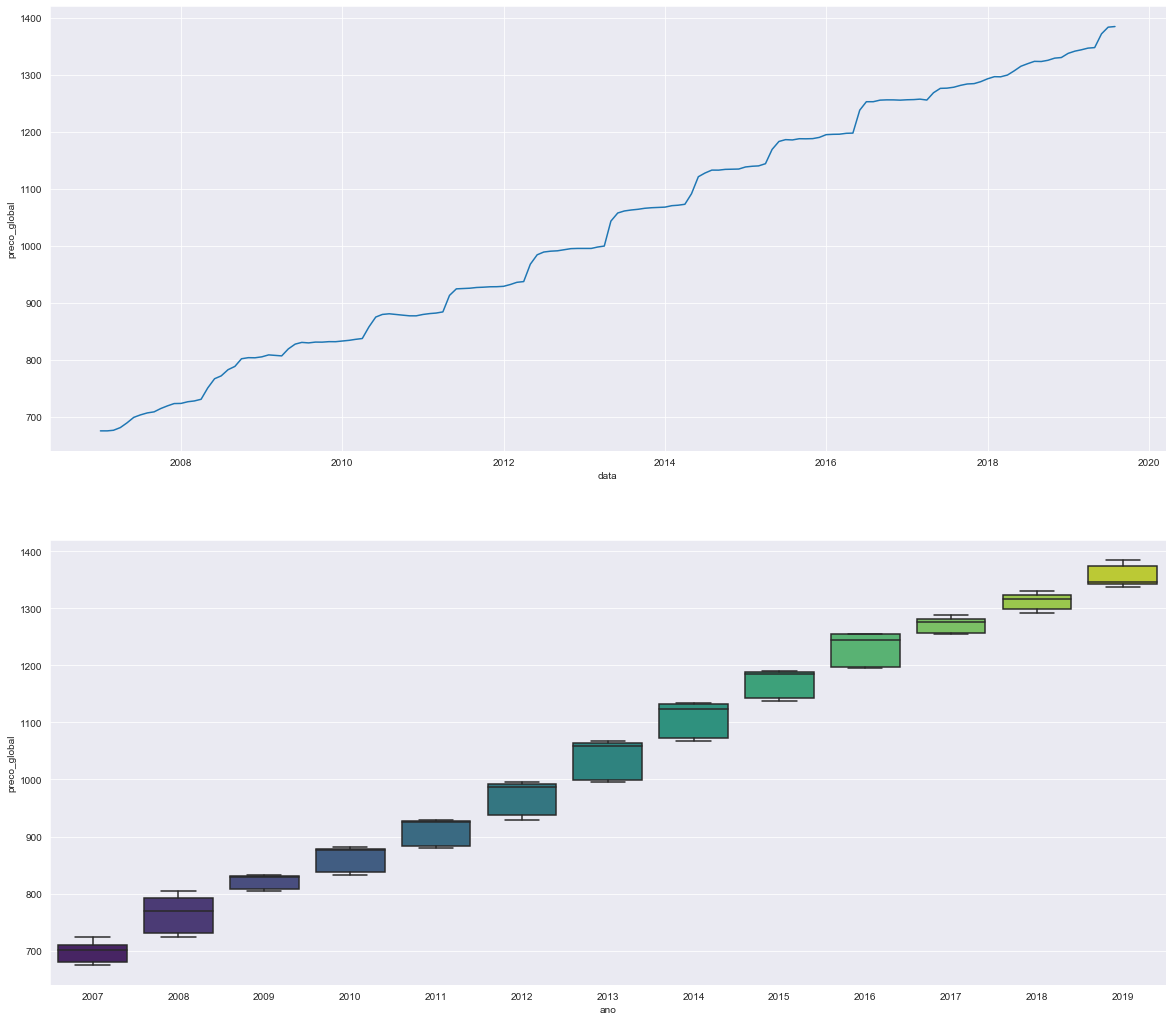

In [35]:
#Visualizar os dados - GLOBAL
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'preco_global', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_global', data=df, ax = ax2, palette = 'viridis');

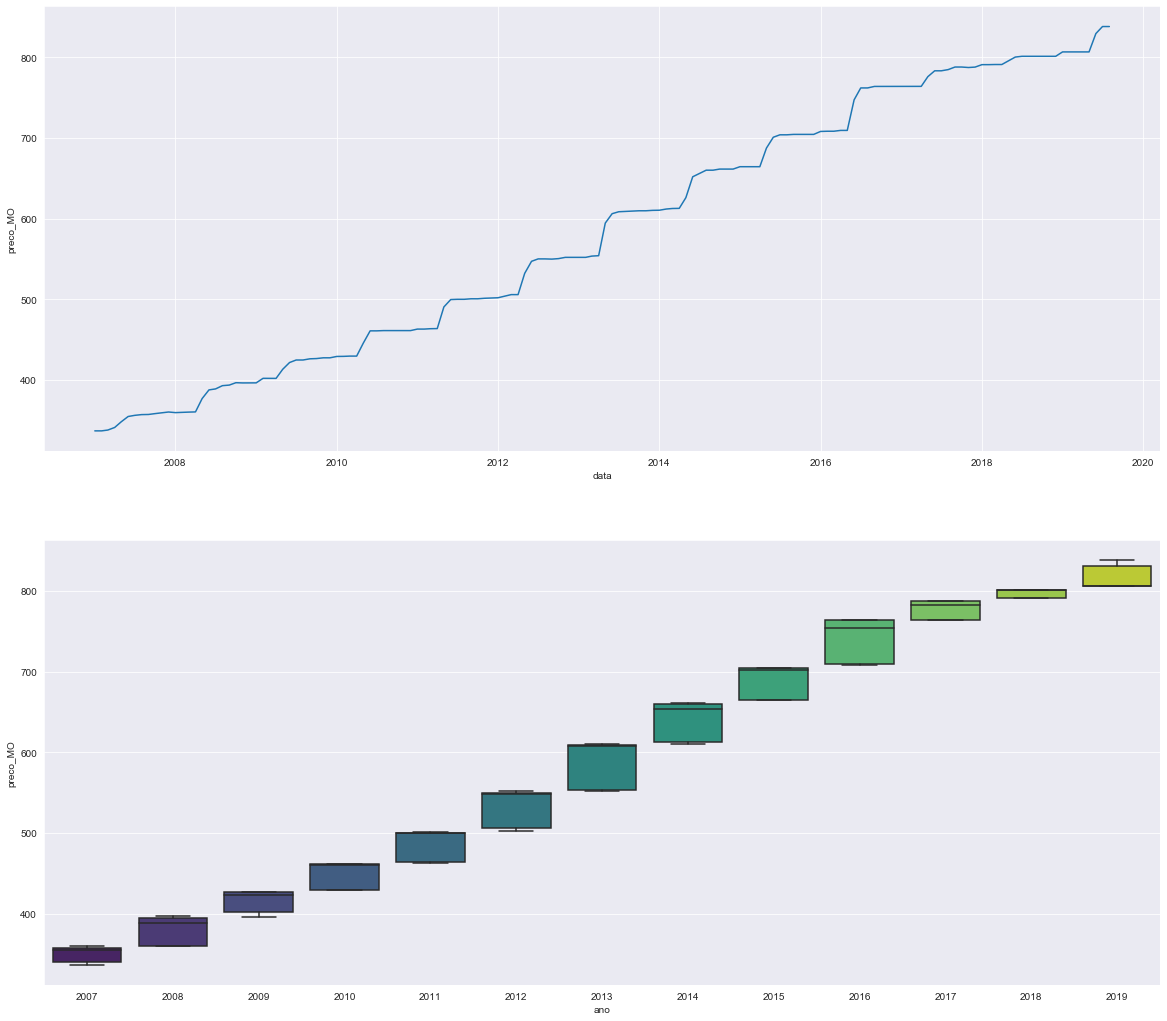

In [36]:
#Visualizar os dados - MÃO-DE-OBRA
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'preco_MO', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_MO', data=df, ax = ax2, palette = 'viridis');

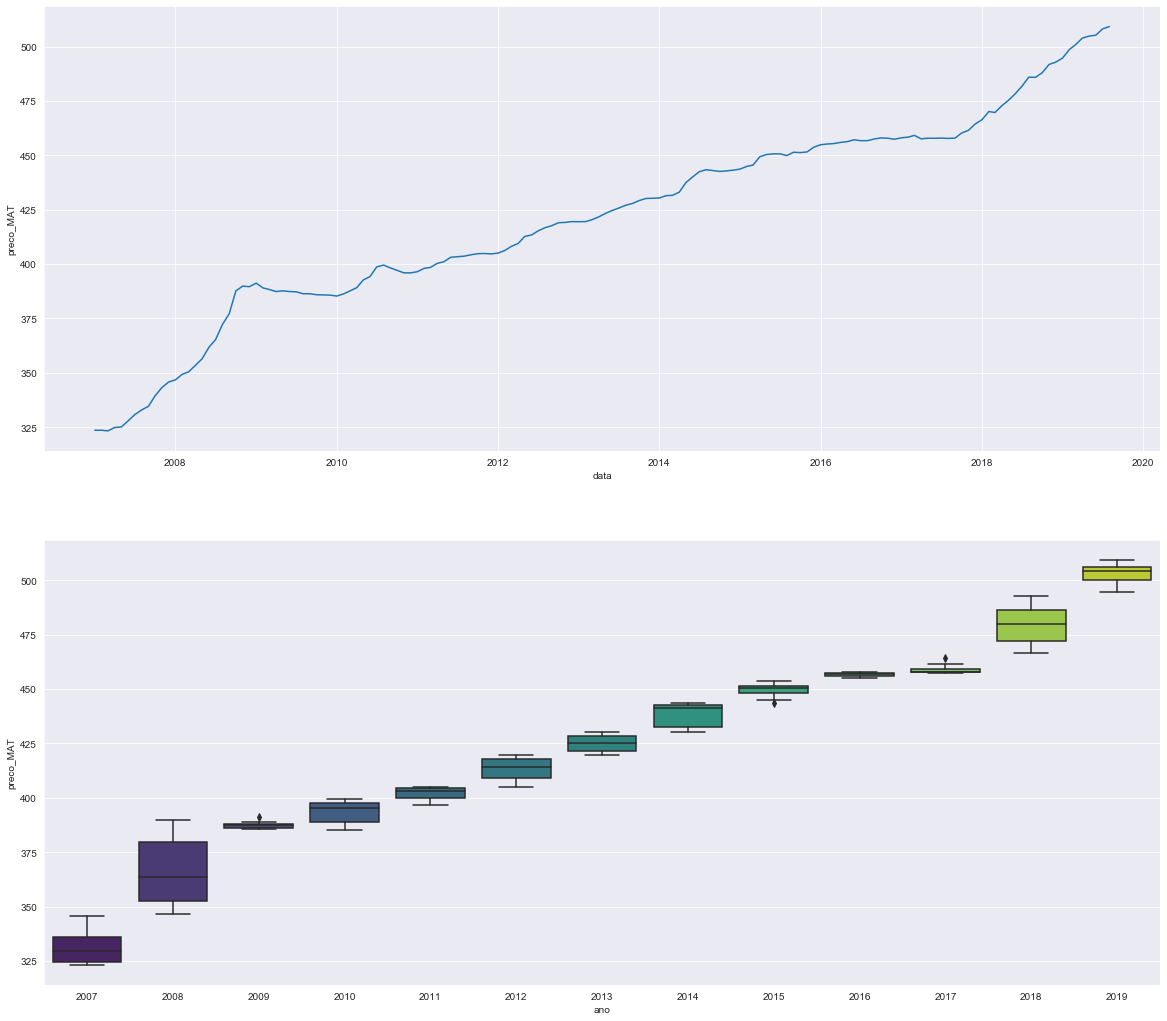

In [37]:
#Visualizar os dados - MATERIAL
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'preco_MAT', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_MAT', data=df, ax = ax2, palette = 'viridis');

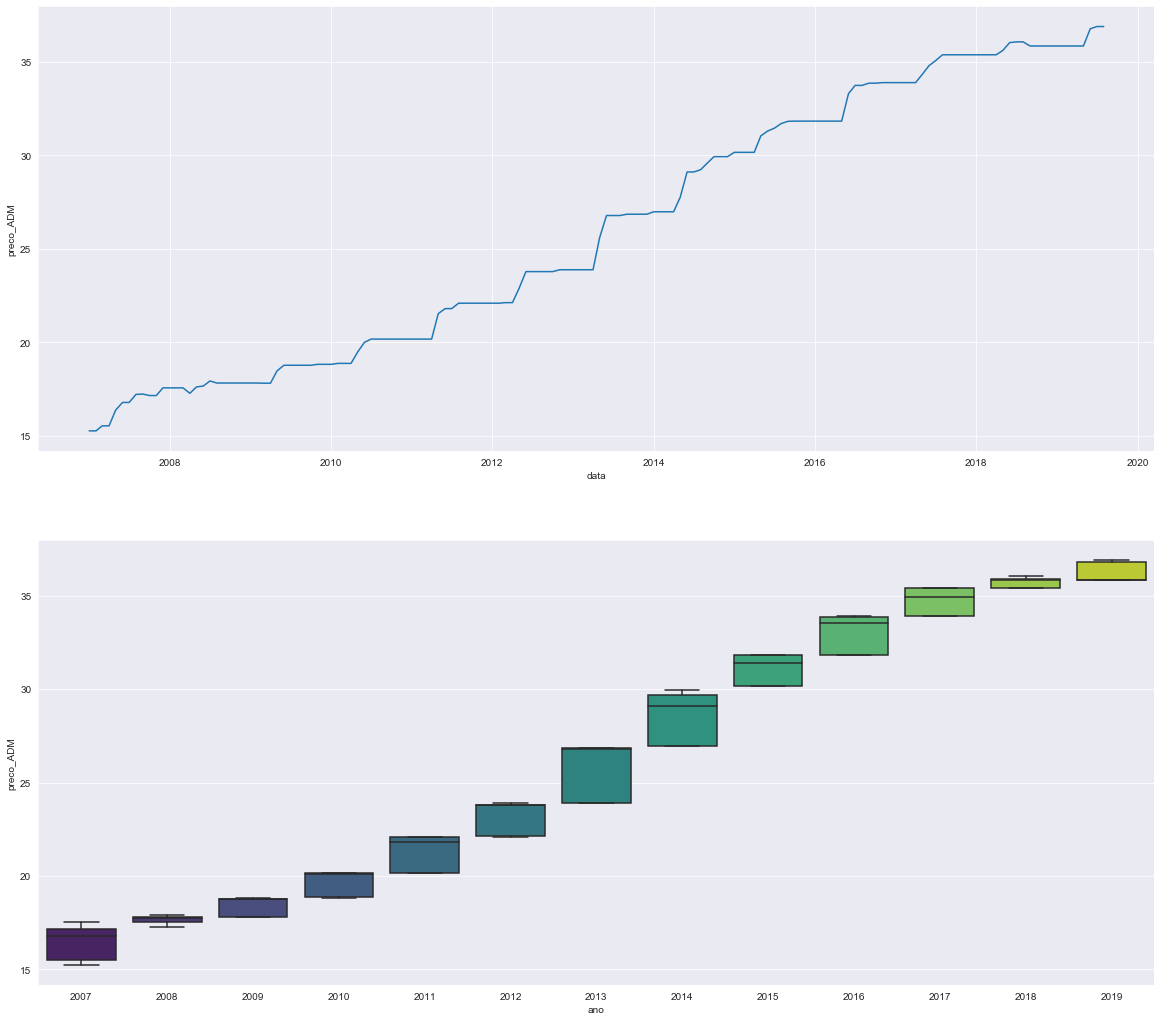

In [38]:
#Visualizar os dados - ADMINISTRAÇÃO
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'preco_ADM', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_ADM', data=df, ax = ax2, palette = 'viridis');

In [13]:
#treinar com os valores de 2007 a 2018 | testar com os valores de 2019
df_train = df.loc[df['ano'] <= 2018]
df_test = df.loc[df['ano'] == 2019]

In [14]:
df_train.tail()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
139,2018,8,1323.23,801.22,485.94,36.07,2018-08-01
140,2018,9,1322.96,801.22,485.89,35.85,2018-09-01
141,2018,10,1325.07,801.22,488.00,35.85,2018-10-01
142,2018,11,1328.88,801.22,491.81,35.85,2018-11-01
143,2018,12,1329.92,801.22,492.85,35.85,2018-12-01


In [15]:
df_test

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
144,2019,1,1337.25,806.66,494.74,35.85,2019-01-01
145,2019,2,1341.18,806.66,498.67,35.85,2019-02-01
146,2019,3,1343.42,806.66,500.91,35.85,2019-03-01
147,2019,4,1346.44,806.66,503.93,35.85,2019-04-01
148,2019,5,1347.34,806.66,504.83,35.85,2019-05-01
149,2019,6,1371.45,829.41,505.27,36.77,2019-06-01
150,2019,7,1383.15,838.13,508.13,36.89,2019-07-01
151,2019,8,1384.26,838.13,509.24,36.89,2019-08-01


### Ajustando o df de train para o formato do PROPHET

In [45]:
#usando os valores de preco_global
df_1 = df_train[['data', 'preco_global']]

In [46]:
df_1.columns = ['ds', 'y']

In [47]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
ds    144 non-null datetime64[ns]
y     144 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


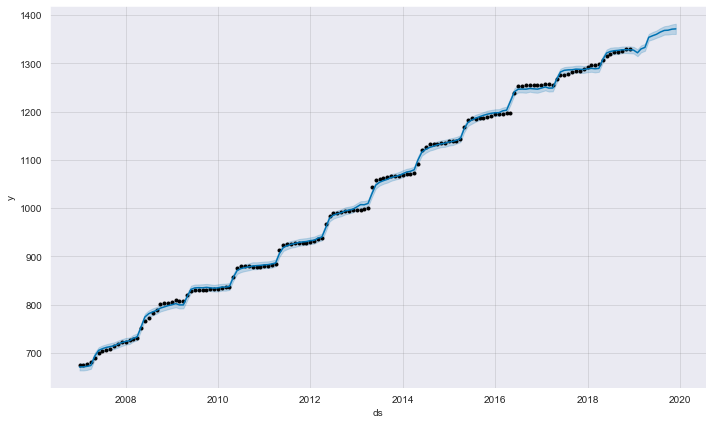

In [50]:
m1 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False).fit(df_1)
future1 = m1.make_future_dataframe(periods=12, freq='M')
fcst1 = m1.predict(future1)
fig1 = m1.plot(fcst1)

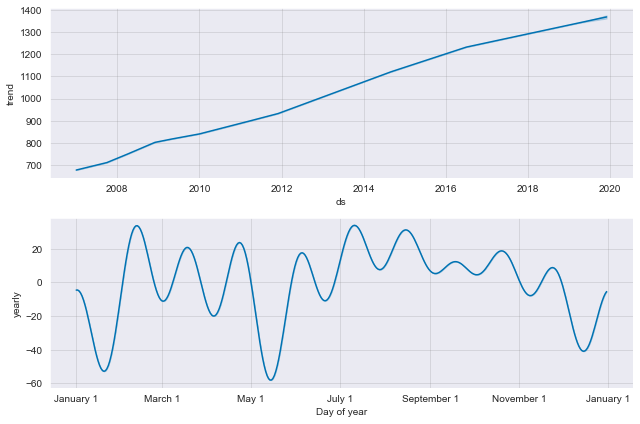

In [51]:
fig2 = m1.plot_components(fcst1)

In [55]:
model1 = fcst1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
model1.tail(12)

,ds,yhat,yhat_lower,yhat_upper
144,2018-12-31,1327.332031,1320.396467,1334.134679
145,2019-01-31,1321.841009,1314.769450,1329.271861
146,2019-02-28,1329.785738,1322.634603,1337.109536
147,2019-03-31,1332.946437,1325.887126,1340.178305
148,2019-04-30,1353.780961,1346.985955,1360.825015
149,2019-05-31,1357.186899,1349.565266,1364.933510
150,2019-06-30,1360.101099,1352.865669,1367.970156
151,2019-07-31,1364.742607,1355.908813,1372.988692
152,2019-08-31,1368.112790,1359.496273,1376.890809
153,2019-09-30,1368.587784,1359.624757,1378.072467


In [56]:
model1 = model1.loc[model1['ds']>='2019-01-01']

In [58]:
model1['ano'] = model1['ds'].dt.year
model1['mes'] = model1['ds'].dt.month

In [60]:
model1 = model1.loc[model1['mes']<=8]

In [62]:
model1['data'] = model1['ano'].map(str) + '-' + model1['mes'].map(str)
model1['ds'] = pd.to_datetime(model1['data'], format = '%Y-%m')


In [64]:
model1.drop(['ano', 'mes', 'data'], axis=1, inplace=True)
model1

,ds,yhat,yhat_lower,yhat_upper
145,2019-01-01,1321.841009,1314.769450,1329.271861
146,2019-02-01,1329.785738,1322.634603,1337.109536
147,2019-03-01,1332.946437,1325.887126,1340.178305
148,2019-04-01,1353.780961,1346.985955,1360.825015
149,2019-05-01,1357.186899,1349.565266,1364.933510
150,2019-06-01,1360.101099,1352.865669,1367.970156
151,2019-07-01,1364.742607,1355.908813,1372.988692
152,2019-08-01,1368.112790,1359.496273,1376.890809


In [74]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 145 to 152
Data columns (total 4 columns):
ds            8 non-null datetime64[ns]
yhat          8 non-null float64
yhat_lower    8 non-null float64
yhat_upper    8 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 320.0 bytes


In [70]:
df_test1 = df_test[['data', 'preco_global']]
df_test1.columns = ['ds', 'y']

In [73]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 144 to 151
Data columns (total 2 columns):
ds    8 non-null datetime64[ns]
y     8 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 512.0 bytes


In [78]:
df_val = pd.merge(df_test1, model1, on='ds')
df_val

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-01-01,1337.25,1321.841009,1314.769450,1329.271861
1,2019-02-01,1341.18,1329.785738,1322.634603,1337.109536
2,2019-03-01,1343.42,1332.946437,1325.887126,1340.178305
3,2019-04-01,1346.44,1353.780961,1346.985955,1360.825015
4,2019-05-01,1347.34,1357.186899,1349.565266,1364.933510
5,2019-06-01,1371.45,1360.101099,1352.865669,1367.970156
6,2019-07-01,1383.15,1364.742607,1355.908813,1372.988692
7,2019-08-01,1384.26,1368.112790,1359.496273,1376.890809


In [79]:
df_val['dif'] = df_val['y'] - df_val['yhat']
df_val

,ds,y,yhat,yhat_lower,yhat_upper,dif
0,2019-01-01,1337.25,1321.841009,1314.769450,1329.271861,15.408991
1,2019-02-01,1341.18,1329.785738,1322.634603,1337.109536,11.394262
2,2019-03-01,1343.42,1332.946437,1325.887126,1340.178305,10.473563
3,2019-04-01,1346.44,1353.780961,1346.985955,1360.825015,-7.340961
4,2019-05-01,1347.34,1357.186899,1349.565266,1364.933510,-9.846899
5,2019-06-01,1371.45,1360.101099,1352.865669,1367.970156,11.348901
6,2019-07-01,1383.15,1364.742607,1355.908813,1372.988692,18.407393
7,2019-08-01,1384.26,1368.112790,1359.496273,1376.890809,16.147210


In [80]:
df_val.describe()

,y,yhat,yhat_lower,yhat_upper,dif
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1356.811250,1348.562193,1341.014144,1356.270986,8.249057
std,19.512004,17.684650,17.188457,18.096551,10.768999
min,1337.250000,1321.841009,1314.769450,1329.271861,-9.846899
25%,1342.860000,1332.156263,1325.073995,1339.411113,6.019932
50%,1346.890000,1355.483930,1348.275610,1362.879262,11.371582
75%,1374.375000,1361.261476,1353.626455,1369.224790,15.593545
max,1384.260000,1368.112790,1359.496273,1376.890809,18.407393


In [84]:
df_val['mes'] = df_val['ds'].dt.month

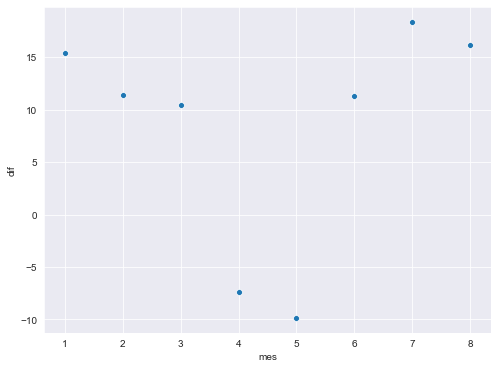

In [85]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = 'mes', y = 'dif', data=df_val)